In [1]:
import numpy as np
import brfss
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

In [2]:
df = brfss.ReadBrfss(nrows=None)

In [3]:
df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [8]:
female_heights = df[df.sex==2].htm3
u = female_heights.mean()
sigma = female_heights.std()

pdf = thinkstats2.NormalPdf(u, sigma)
pdf.Density(u+sigma)

0.03328731904744125

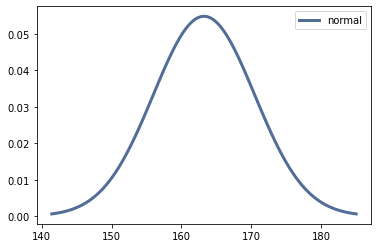

<Figure size 576x432 with 0 Axes>

In [9]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Show()

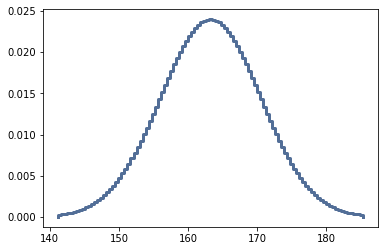

In [21]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')

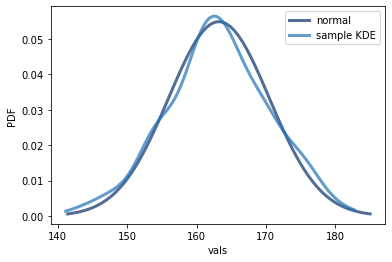

In [28]:
import random

sample = [random.gauss(u, sigma) for i in range(500)]
sample_pdf = thinkstats2.EstimatedPdf(sample)

thinkplot.Pdf(pdf, label='normal')
# the book had this line wrong said pdf instead of the sample_pdf
thinkplot.Pdf(sample_pdf, label='sample KDE')
thinkplot.Config(xlabel='vals', ylabel='PDF')

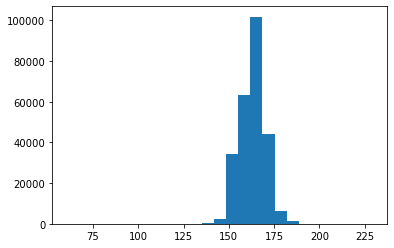

0.09222872448051538

In [39]:
import matplotlib.pyplot as plt
plt.hist(female_heights, bins=25)
plt.show()

g = lambda x,m,s: 3*(x - m)/s
g(female_heights.mean(), female_heights.median(), female_heights.std())

In [69]:
def Median(xs):
    cdf = thinkstats2.MakeCdfFromList(xs)
    return cdf.Value(0.5)

def pearson_median_skewness(xs):
    median = Median(xs)
    mean = sum(x for x in xs)/len(xs)
    var = sum((x-mean)**2 for x in xs)/len(xs)
    std = np.sqrt(var)
    gp = 3*(mean-median)/std
    return gp

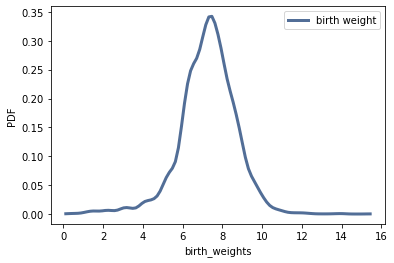

In [80]:
import first

live, firsts, others = first.MakeFrames()
data = live.totalwgt_lb.dropna()
pdf = thinkstats2.EstimatedPdf(data)
thinkplot.Pdf(pdf, label='birth weight')
thinkplot.Config(xlabel='birth_weights', ylabel='PDF')

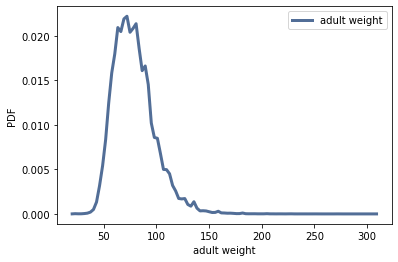

In [82]:
pdf2 = thinkstats2.EstimatedPdf(df.wtkg2.dropna())
thinkplot.Pdf(pdf2, label='adult weight')
thinkplot.Config(xlabel='adult weight', ylabel='PDF')

In [3]:
# exercise...

import hinc
income_df = hinc.ReadData()

In [191]:
income_df.tail()

,income,freq,cumsum,ps
37,189999.0,364,116188,0.948799
38,194999.0,432,116620,0.952327
39,199999.0,378,116998,0.955413
40,249999.0,2549,119547,0.976229
41,inf,2911,122458,1.000000


In [193]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [194]:
log_scale_sample = InterpolateSample2(income_df, log_upper=6.0)

In [237]:
def raw_moment(xs, k):
    return sum(x**k for x in xs)/len(xs)

def central_moment(xs, k):
    mean = raw_moment(xs, 1)
    return sum((x-mean)**k for x in xs)/len(xs)

def standardized_moment(xs, k):
    var = central_moment(xs, 2)
    std = np.sqrt(var)
    return central_moment(xs, k)/std**k

def skewness(xs):
    return standardized_moment(xs, 3)

In [239]:
# reversing the log_base_10 (took awhile to understand InterpolateSample)
sample = 10**log_scale_sample
print('mean: ',sample.mean())
print('median: ',Median(sample))
print('skew: ',skewness(sample))
print('pearson median skew: ',pearson_median_skewness(sample))

mean:  74278.7075311872
median:  51226.45447894046
skew:  4.949920244429583
pearson median skew:  0.7361258019141782


In [368]:
below_mean = np.where(sample < sample.mean())
percent_below_mean = below_mean[0].shape[0]/sample.shape[0]
print('fraction of households below mean income:\n{}'.format( percent_below_mean))

fraction of households below mean income:
0.660005879566872


mean: 74278.707 <br>
median: 51226.454 <br>
skew: 4.949 <br>
pearson median skew: 0.736 <br><br>

fraction of households below mean income: 0.660